### Data analysis on diabetes using linear regression
Diabetes if glucose level > 126

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_diabetes

In [3]:
# load dataset
diabetes_data = load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df["target"] = diabetes_data.target

In [4]:
# check shape
print(df.shape)
# check missing vals
print(df.isnull().sum())

(442, 11)
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
# preview data
df.head()
# check summary statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Text(0, 0.5, 'Frequency')

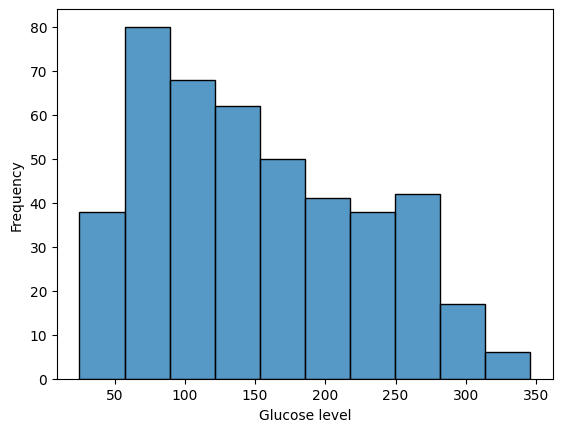

In [6]:
# visualisation
sns.histplot(df["target"])
plt.xlabel("Glucose level")
plt.ylabel("Frequency")

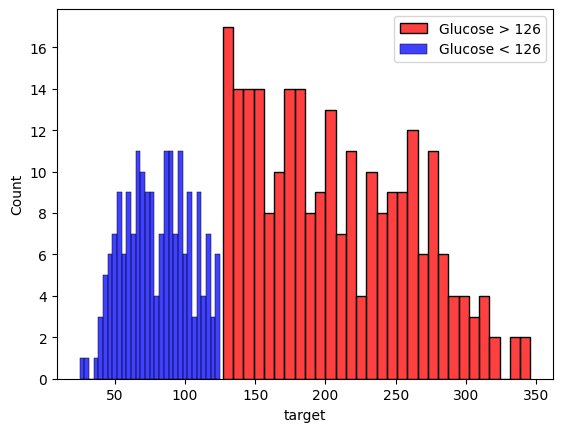

In [7]:
# visualise the distribution above and below 126
sns.histplot(df[df["target"]>126]["target"],color="red",bins=30,label="Glucose > 126")
sns.histplot(df[df["target"]<126]["target"],color="blue",bins=30, label="Glucose < 126")
plt.legend()

<Axes: >

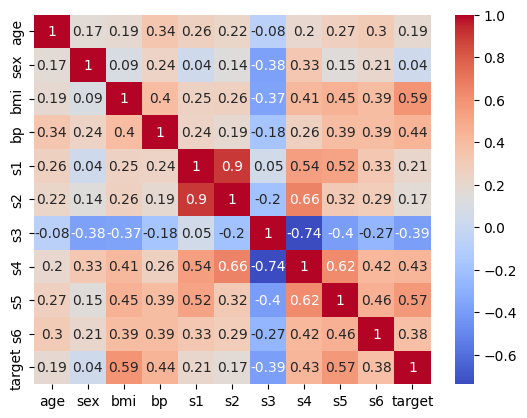

In [8]:
# check correlation between variables
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm")

<Axes: xlabel='bmi', ylabel='target'>

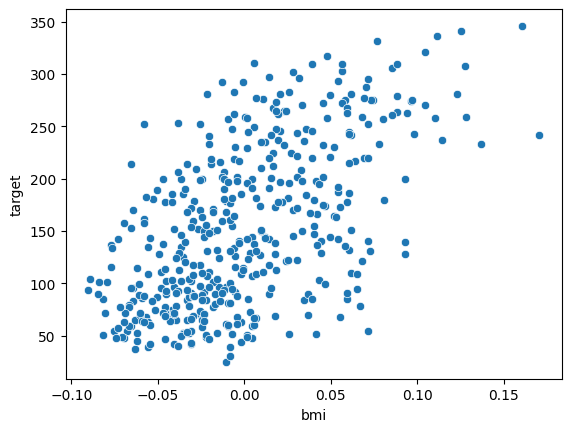

In [9]:
# investigate relationship between bmi and target
sns.scatterplot(x="bmi",y="target",data=df)

In [10]:
# prepare data for regression 
# we are interested in prediction for unseen data
X = df.drop("target", axis=1)
y = df["target"]

# split to train (80%) and test (20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=314)

In [11]:
# fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# make prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE for training data = 2872.20, MSE for testing data = 2837.57
R2 score for training data = 0.52, R2 score for testing data = 0.51


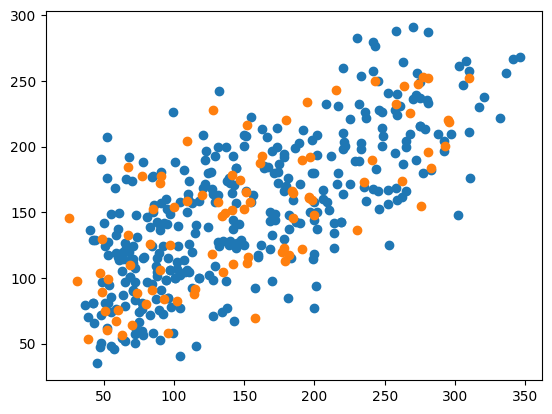

In [13]:
# model evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE for training data = {mse_train:.2f}, MSE for testing data = {mse_test:.2f}")
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print(f"R2 score for training data = {r2_train:.2f}, R2 score for testing data = {r2_test:.2f}")

# plot observed vals against predicted vals
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_test_pred)

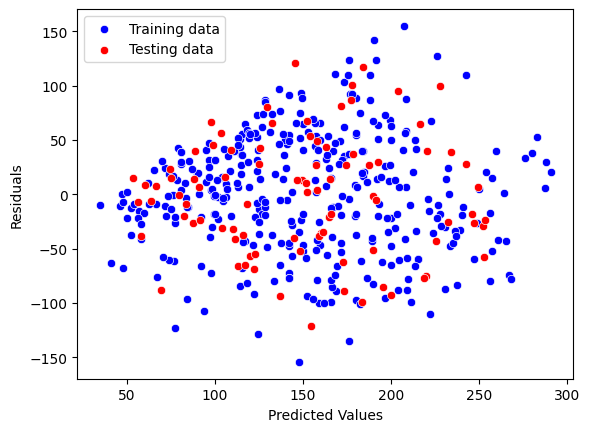

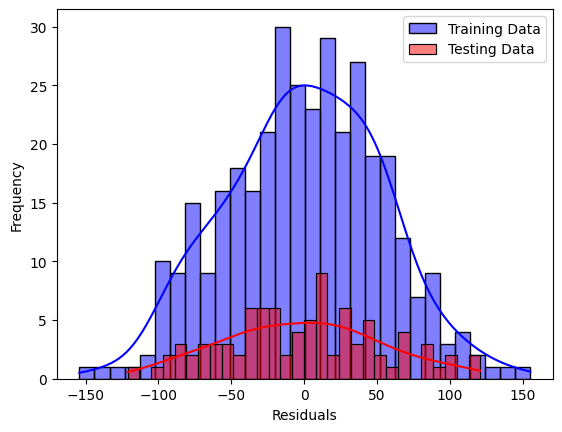

In [19]:
# residual analyis
# residual plots
# there should be no pattern to validify model
sns.scatterplot(x=y_train_pred, y=y_train_pred-y_train, color = "blue", label = "Training data")
sns.scatterplot(x=y_test_pred, y=y_test_pred-y_test, color = "red", label = "Testing data")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.legend()
plt.show()

#histogram
sns.histplot(y_train_pred-y_train,color="blue",label="Training Data",kde=True,bins=30)
sns.histplot(y_test_pred-y_test,color="red",label="Testing Data",kde=True,bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()